# Connectar una base de dades  PostgreSQL desde Python

------


*Prof. Antoni Oliver Gelabert - Administracio de Sistemes Gestors de Bases de Dades (CIFP Pau Casesnoves, Curs 2022/2023)*


Pas 1. Instalam la llibreria psycopg2 que ens permet connectar amb la BBDD postgreSQL desde python

In [1]:
!pip install psycopg2

2. Descarregam la base de dades dellstore (si no funciona wget la podem descarregar i posar al directori on tenim el notebook. L'haurem de descomprimir i desempaquetar.

In [ ]:
!wget https://ftp.postgresql.org/pub/projects/pgFoundry/dbsamples/dellstore2/dellstore2-normal-1.0/dellstore2-normal-1.0.tar.gz

In [139]:
!gzip -d dellstore2-normal-1.0.tar.gz

In [140]:
!ls

Connect_SQL_python_activity.ipynb
Connect_sql_database_python - Jupyter Notebook.pdf
Connect_sql_database_python.ipynb
connect_mysql_db_python.ipynb
connect_postgreSQL_python.ipynb
dellstore2-normal-1.0.tar
diagrama_caja_precios_de_productos_dellstore.png
histograma_duracion_peliculas_sakila.png
histograma_precios_de_productos_dellstore.png


In [141]:
!tar -xvf dellstore2-normal-1.0.tar

x dellstore2-normal-1.0/LICENSE
x dellstore2-normal-1.0/README
x dellstore2-normal-1.0/dellstore2-normal-1.0.sql


3. Una vegada descomprimida i desempaquetada la BBDD dellstore en el directori actual, crearem la BBDD emprant el client psql (es pot fer directament per terminal si no vos va be)

In [ ]:
!psql -U postgres -c "create database dellstore;"

4. Una vegada creada la BBDD importarem l'esquema i les dades del fitxer SQL 

In [ ]:
!psql -U postgres dellstore < dellstore2-normal-1.0/dellstore2-normal-1.0.sql

5. Ara ja treballam amb python (no hi ha signe d'exclamacio). Primer importam la llibrera psycopg2 per treballar amb postgreSQL i despres definim una connexio amb les credencials (creau l'usuari usudellstore amb password usudellstore previament i assignauli permisos de consulta de la BBDD dellstore.

In [62]:
import psycopg2
conn.close()
conn = psycopg2.connect(host="localhost",database="dellstore",user="usudellstore",password="usudellstore")

In [63]:
# create a cursor
cur = conn.cursor()

In [56]:
# execute a statement
print('PostgreSQL database version:')
cur.execute('SELECT version()')

PostgreSQL database version:


In [57]:
# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)

('PostgreSQL 14.5, compiled by Visual C++ build 1914, 64-bit',)


6. Ara provam de seleccionar els productes de la base de dades 

In [58]:
cur.execute('SELECT * from products')

7. Emmagatzemam els resultats dins productes i visualitzem les tuples 3 a 6

In [59]:
productes = cur.fetchall()
productes[2:5]

[(3, 6, 'ACADEMY ADAPTATION', 'VIVIEN KAHN', Decimal('28.99'), 0, 7173),
 (4, 3, 'ACADEMY AFFAIR', 'ALAN MARX', Decimal('14.99'), 0, 8042),
 (5, 3, 'ACADEMY AFRICAN', 'CARRIE HANNAH', Decimal('11.99'), 1, 2183)]

8. Guardem els noms dels camps dins labels

In [83]:
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'products'")

In [84]:
labels = cur.fetchall()
labels

[('special',),
 ('common_prod_id',),
 ('category',),
 ('prod_id',),
 ('price',),
 ('actor',),
 ('title',)]

In [85]:
labels[2][0]

'category'

9. Prova de reemplacament de texte. Fixem-nos que els titols de camps tenen una coma que no volem dins el titol

In [99]:
prova = 'texte'
prova.replace('e','')

'txt'

10. Per eliminar totes les comes implantam un loop

In [ ]:
newlab=[]
for i in range(len(labels)):
    newlab.append(labels[i][0].replace(',',''))
newlab

11. Passam a treballar amb pandas i posem les dades dins un dataframe per treure estadistiques i grafics interessants

In [105]:
import pandas as pd
df =[]
df = pd.DataFrame(productes, columns=newlab)

In [106]:
df.head()

,special,common_prod_id,category,prod_id,price,actor,title
0,1,14,ACADEMY ACADEMY,PENELOPE GUINESS,25.99,0,1976
1,2,6,ACADEMY ACE,EWAN RICKMAN,20.99,0,6289
2,3,6,ACADEMY ADAPTATION,VIVIEN KAHN,28.99,0,7173
3,4,3,ACADEMY AFFAIR,ALAN MARX,14.99,0,8042
4,5,3,ACADEMY AFRICAN,CARRIE HANNAH,11.99,1,2183


12. Fixem-nos en els tipus de dades, com price es object, l'hem de canviar a float ja que es llegira com a string

In [125]:
df.dtypes


special            int64
common_prod_id     int64
category          object
prod_id           object
price             object
actor              int64
title              int64
dtype: object

In [126]:
df['price'] = df['price'].astype(float)

13. Verifiquem que s'ha produit el canvi

In [142]:
df.dtypes

special             int64
common_prod_id      int64
category           object
prod_id            object
price             float64
actor               int64
title               int64
dtype: object

14. Dibuixem l'histograma de preus

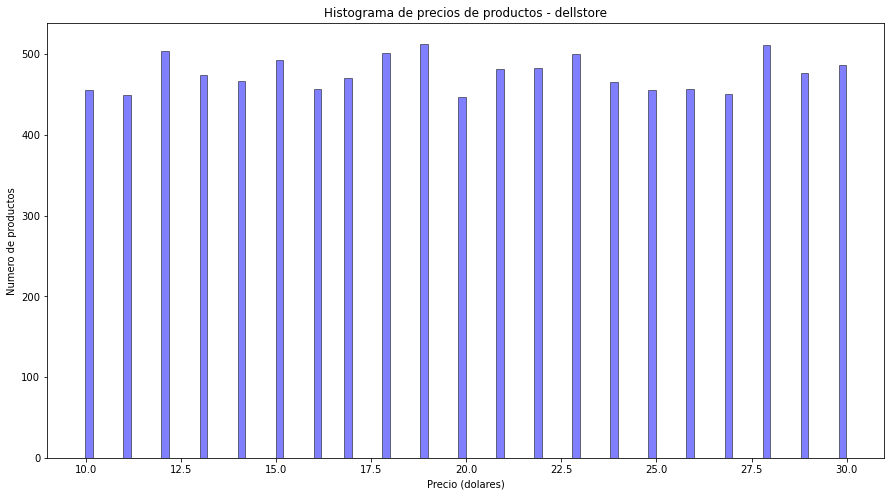

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,8])
plt.title('Histograma de precios de productos - dellstore') 
plt.xlabel('Precio (dolares)')
plt.ylabel('Numero de productos')
plt.hist(df['price'],bins=100,facecolor='blue', alpha=0.5, edgecolor = 'black');
plt.savefig("histograma_precios_de_productos_dellstore.png",dpi=200)

Veim que la distribucio es bastant regular amb preus compresos entre 10 i 30 dolars

15. Treim estadistiques des preus

In [129]:
df['price'].describe().round(2)

count    10000.00
mean        20.02
std          6.04
min          9.99
25%         14.99
50%         19.99
75%         24.99
max         29.99
Name: price, dtype: float64

16. Dibuixem un diagrama de caixa estadistic

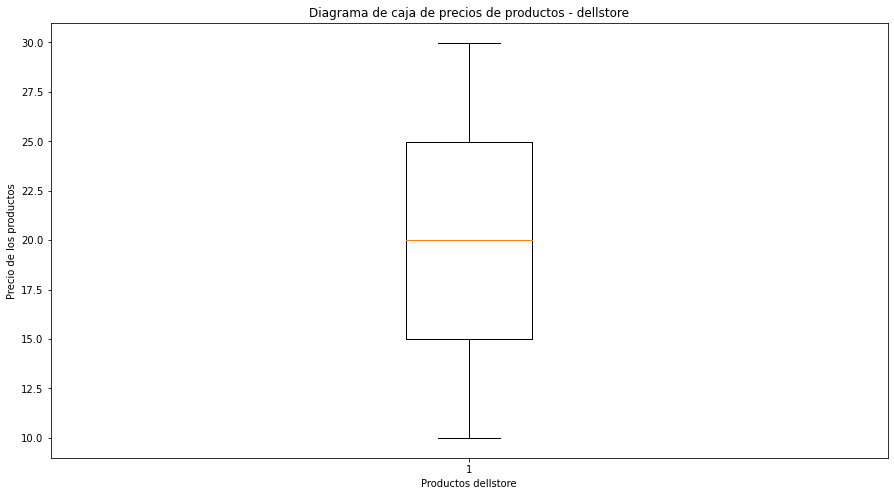

In [136]:
plt.figure(figsize=[15,8])
plt.title('Diagrama de caja de precios de productos - dellstore') 
plt.xlabel('Productos dellstore')
plt.ylabel('Precio de los productos')
plt.boxplot(df['price']);
plt.savefig("diagrama_caja_precios_de_productos_dellstore.png",dpi=200)

16. Finalment farem el mateix amb la taula orders

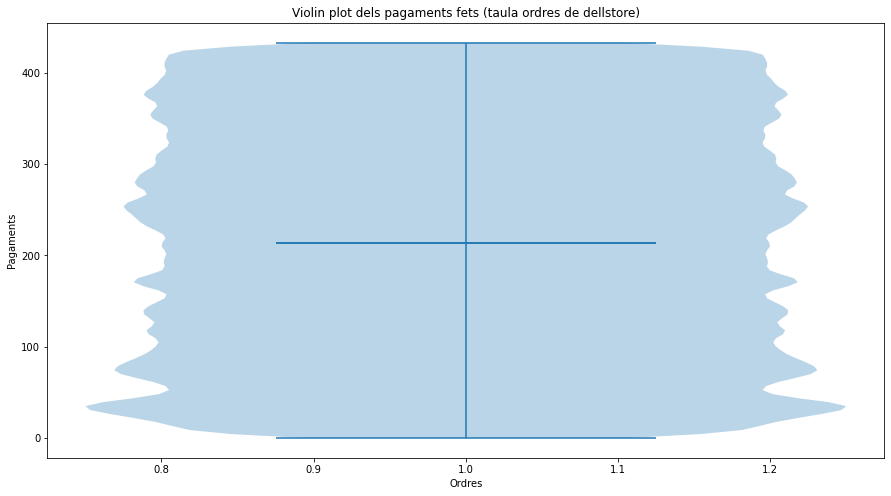

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
conn.close()
conn = psycopg2.connect(host="localhost",database="dellstore",user="usudellstore",password="usudellstore")

cur = conn.cursor()
cur.execute('SELECT * from orders')
ordres = cur.fetchall()

cur = conn.cursor()
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'orders'")
labels = cur.fetchall()

newlab=[]
for i in range(len(labels)):
    newlab.append(labels[i][0].replace(',',''))

df =[]
df = pd.DataFrame(ordres, columns=newlab)

df['totalamount'] = df['totalamount'].astype(float)

plt.figure(figsize=[15,8])
plt.title('Violin plot dels pagaments fets (taula ordres de dellstore)') 
plt.xlabel('Ordres')
plt.ylabel('Pagaments')
plt.violinplot(df['totalamount'], widths=0.5, showmeans=True, showextrema=True, showmedians=True, bw_method=0.05)
plt.savefig("violinplot_ordres_dellstore.png",dpi=200)

In [148]:
df['totalamount'].describe().round(1)

count    12000.0
mean       213.9
std        125.1
min          0.0
25%        104.3
50%        214.1
75%        321.2
max        433.0
Name: totalamount, dtype: float64

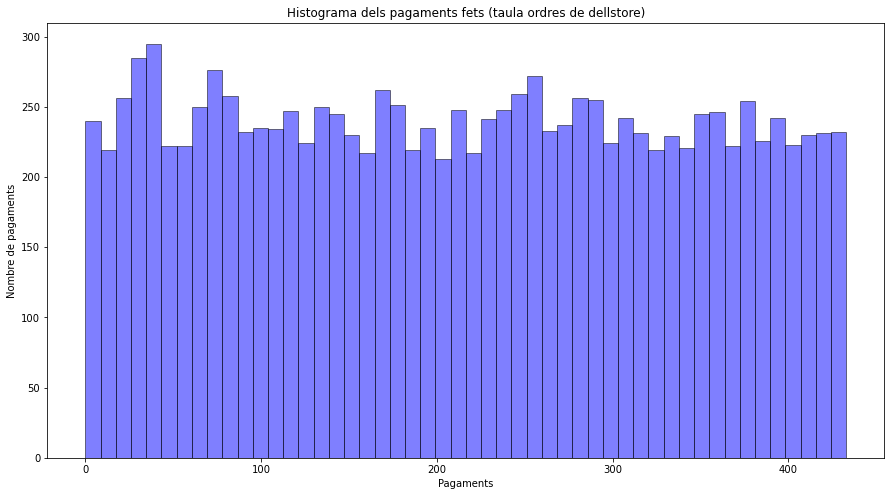

In [164]:
plt.figure(figsize=[15,8])
plt.title('Histograma dels pagaments fets (taula ordres de dellstore)') 
plt.xlabel('Pagaments')
plt.ylabel('Nombre de pagaments')
plt.hist(df['totalamount'],bins=50,facecolor='blue', alpha=0.5, edgecolor = 'black')
plt.savefig("violinplot_ordres_dellstore.png",dpi=200)

In [165]:
conn.close()

Ara, prova de fer els seguents exercicis al mateix notebook

1. Fes un histograma de la quantitat de productes solicitats per cada ordre, en la linia d'ordres i comenta el resultat
2. Descarrega i importa la BBDD usda a postgreSQL: https://ftp.postgresql.org/pub/projects/pgFoundry/dbsamples/
3. Analitza els pesos dels paquets fent un histograma amb matplotlib. Extreu les estadistiques i comenta el resultat

Per mes bases de dades podeu consultar aqui: https://wiki.postgresql.org/wiki/Sample_Databases